# Seaborn Part 3: Advanced Features

This notebook covers advanced Seaborn techniques, including creating custom multi-plot grids, fine-tuning plot aesthetics, and combining Seaborn with other libraries for highly customized statistical visualizations.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tips = sns.load_dataset("tips")

## Multi-facet Plotting (`FacetGrid`)

`FacetGrid` is a powerful tool for creating a matrix of plots based on the levels of categorical variables. While figure-level functions like `relplot` and `catplot` use this object internally, you can use it directly for more control.

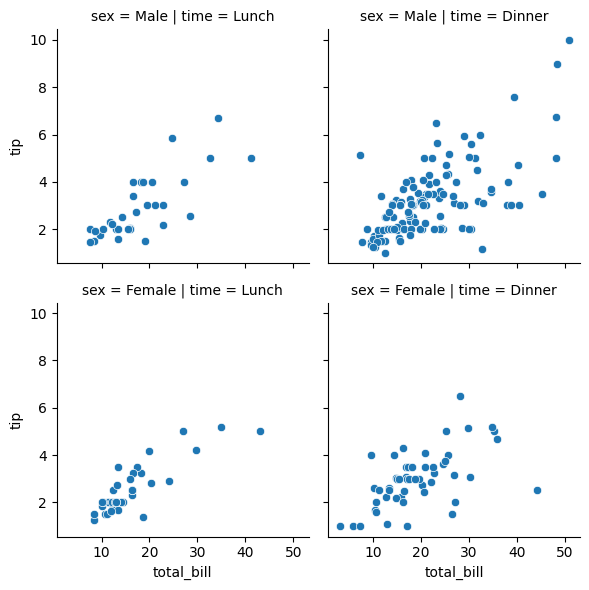

In [2]:
# 1. Initialize the grid
g = sns.FacetGrid(tips, col="time", row="sex")

# 2. Map a plotting function to the grid
g.map(sns.scatterplot, "total_bill", "tip")

plt.show()

## Combining Multiple Plots with Matplotlib

Since Seaborn is built on Matplotlib, you can use them together. You can place Seaborn plots on a Matplotlib axes object, just like any other plot.

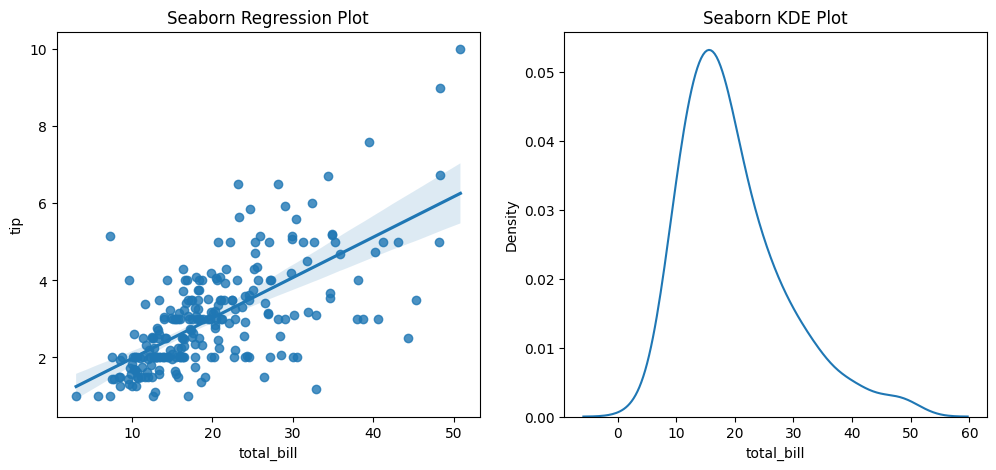

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(data=tips, x="total_bill", y="tip", ax=ax1)
ax1.set_title('Seaborn Regression Plot')

sns.kdeplot(data=tips, x="total_bill", ax=ax2)
ax2.set_title('Seaborn KDE Plot')

plt.show()

## Using Seaborn with Pandas `groupby`

You can perform a `groupby` aggregation in Pandas and then use Seaborn to visualize the result.

C:\Users\tyagi\AppData\Local\Temp\ipykernel_15164\3354214115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()


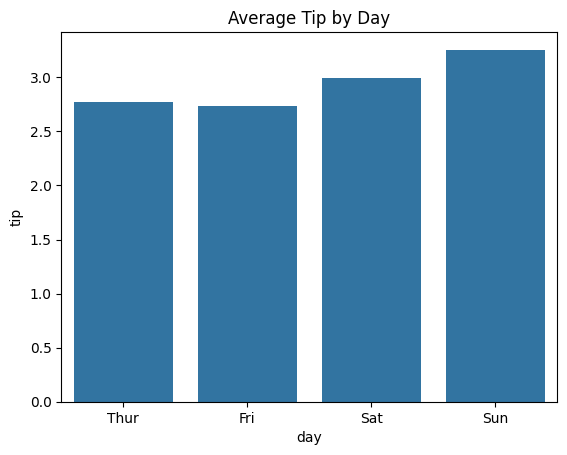

In [4]:
# Calculate average tip by day
avg_tip_by_day = tips.groupby('day')['tip'].mean().reset_index()

sns.barplot(data=avg_tip_by_day, x='day', y='tip')
plt.title('Average Tip by Day')
plt.show()

## Statistical Annotations

While not a built-in feature of Seaborn, the `statannotations` library works well with it to add statistical test results (like p-values) to your plots.

In [5]:
!pip install statannotations


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: t-test independent samples, P_val:8.004e-01 t=2.537e-01
Thur vs. Sat: t-test independent samples, P_val:6.282e-02 t=-1.875e+00
Fri vs. Sun: t-test independent samples, P_val:6.036e-02 t=-1.901e+00


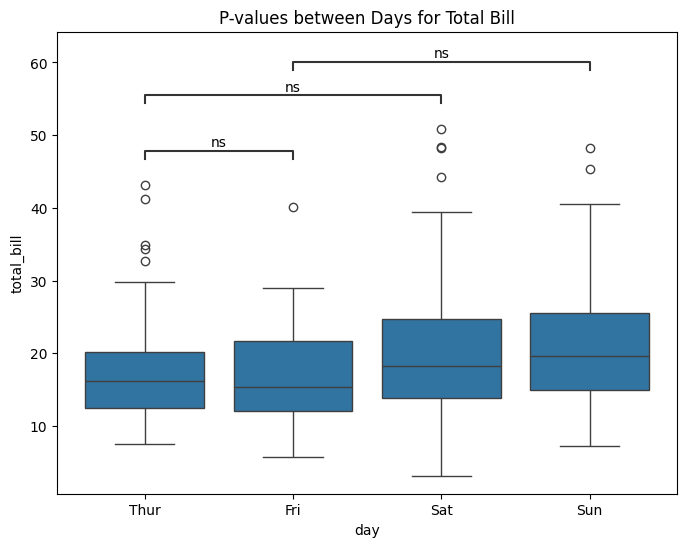

In [6]:
from statannotations.Annotator import Annotator

fig, ax = plt.subplots(figsize=(8, 6))

plot_params = {
    'data': tips,
    'x': 'day',
    'y': 'total_bill',
    'order': ['Thur', 'Fri', 'Sat', 'Sun']
}

sns.boxplot(**plot_params, ax=ax)

# Define pairs for statistical comparison
pairs = [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")]

# Add annotations
annotator = Annotator(ax, pairs, **plot_params)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax.set_title('P-values between Days for Total Bill')
plt.show()

## Time Series with Rolling Windows

You can combine Pandas' time series capabilities with Seaborn for powerful visualizations.

In [8]:
import numpy as np

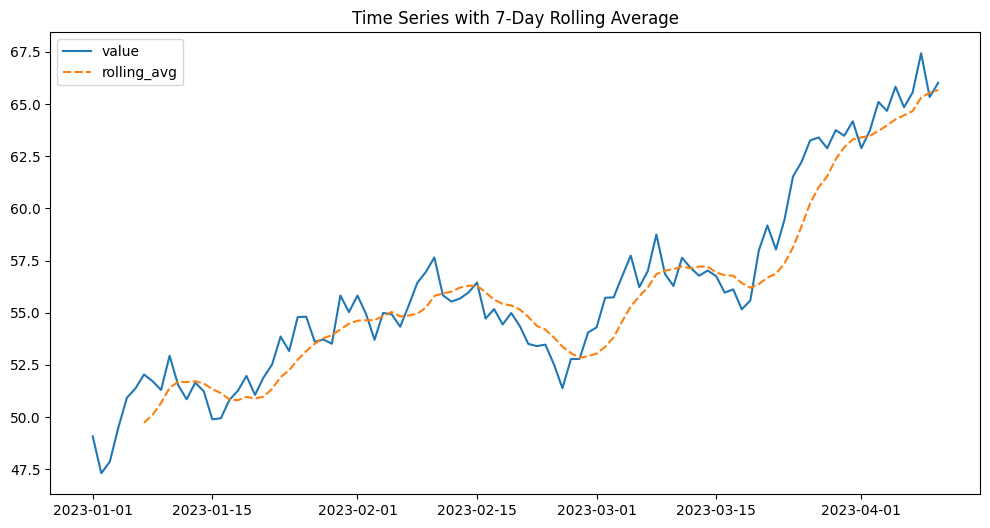

In [9]:
# Create sample time series data
dates = pd.to_datetime(pd.date_range('2023-01-01', periods=100))
data = pd.Series(np.random.randn(100).cumsum() + 50, index=dates, name='value')

# Calculate rolling average
rolling_avg = data.rolling(window=7).mean().rename('rolling_avg')

# Combine into a single DataFrame
ts_df = pd.concat([data, rolling_avg], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=ts_df, ax=ax)
ax.set_title('Time Series with 7-Day Rolling Average')
plt.show()